In [2]:
import numpy as np
from math import sin
from scipy.linalg import eigh
from numpy.linalg import inv
from matplotlib import pyplot as plt


Frequencies in rad/s
[ 94.27552799 272.03992416 520.44106361 882.9387505 ]
-o-o-o-o-o-o-
Frequencies in Hz
[ 15.00441629  43.29649865  82.83076786 140.52406659]
-o-o-o-o-o-o-
Eigenvectors
[[ -3.26104172   6.95155762   6.37363299  -0.64672724]
 [ -4.60172526   5.28278614  -7.70310276   4.07167079]
 [ -5.61521233   0.48636351  -5.08820694 -16.60350338]
 [ -6.47897748  -4.41804017   1.66124729   1.55264164]]


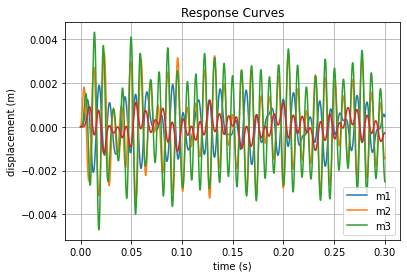

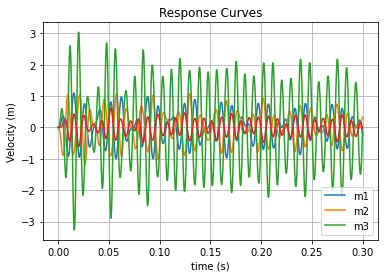

In [3]:
m = 0.01 #kgm^2
k = 1000.0 #Nm/rad
omega = 690.8062 #rad/s
c = 0.02 #nms/rad
F0 =1.0 #N
dof = 4

K = np.array([[1.5*k,-k, 0, 0],[-k,2*k,-k,0],[0, -k,2*k,-k],[0, 0, -k, k]])
C = np.array([[1.5*c,-c,0, 0],[-c,2*c,-c,0],[0,-c,2*c, -c],[0,0,-c,c]])
M = np.array([[m, 0, 0, 0],[0, 0.8*m, 0, 0],[0, 0, 0.3*m,0],[0,0,0,1.5*m]])
I = np.identity(dof)

A = np.zeros((2*dof, 2*dof))
B = np.zeros((2*dof, 2*dof))
Y = np.zeros((2*dof, 1))
F = np.zeros((2*dof, 1))

A[dof:2*dof, dof:2*dof] = M
A[0:dof, 0:dof] = I
B[dof:2*dof, 0:dof] = K
B[0:dof, dof:2*dof] = -I
B[dof:2*dof,dof:2*dof] = C
evals, evecs = eigh(K,M)
frequencies = np.sqrt(evals) #rad/s
frequencies_hz = frequencies/(2*np.pi) #Hz
#c_crit = 2 * np.sqrt(M.dot*K.dot)

end_time = 0.3
time_step = 0.000001

A_inv = inv(A)
force = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []
X7 = []
X8 = []

for t in np.arange(0, end_time, time_step):
    F[1] = F0 * sin(omega*t)
    Y_new = Y + time_step * A_inv.dot(F-B.dot(Y))
    Y = Y_new
    force.extend(F[1])
    X1.extend(Y[0])
    X2.extend(Y[1])
    X3.extend(Y[2])
    X4.extend(Y[3])
    X5.extend(Y[4])
    X6.extend(Y[5])
    X7.extend(Y[6])
    X8.extend(Y[7])
            #Y[3],[4],[5] are the displacements; [0]-[2] are velocities

time = [round(t,5) for t in np.arange(0, end_time, time_step)]
print("Frequencies in rad/s")
print(frequencies)
print("-o-o-o-o-o-o-")
print("Frequencies in Hz")
print(frequencies_hz)
print("-o-o-o-o-o-o-")
print("Eigenvectors")
print(evecs)

plt.figure(1)
plt.plot(time,X1)
plt.plot(time,X2)
plt.plot(time,X3)
plt.plot(time,X4)
plt.grid()

plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.title('Response Curves')
plt.legend(['m1','m2','m3'], loc='lower right')
plt.show()

plt.figure(2)
plt.plot(time,X5)
plt.plot(time,X6)
plt.plot(time,X7)
plt.plot(time,X8)
plt.grid()

plt.xlabel('time (s)')
plt.ylabel('Velocity (m)')
plt.title('Response Curves')
plt.legend(['m1','m2', 'm3'], loc='lower right')
plt.show()
